# Homework 4 - Hard Coding

## Group #12: Vishal Matta, Michele Meo, Giulio Rago

# Hashing Task

### Import data and libraries

In [98]:
import os
import time
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

We import the **hashing_lib** module that contains all the functions used to solve the hashing task:
you can find it in the **utils** folder of the repository.  
It is suggested to read the script every time a function imported from it is used to better understand the code.

In [13]:
from utils import hashing_lib as hs

We import the data in two differents lists, then we delete the last element as it contains an empty string.  
We find out that the passwords to be stored in the filter are 100000000 and the passwords we want  
to compare with the filter, once we stored the first set of passwords, are 39000000.

In [14]:
with open ("/Users/Michele/PycharmProjects/ADM-HW4/DATA/passwords1.txt", "r") as file:
    passwords1 = list(file.read().split("\n"))
    
with open ("/Users/Michele/PycharmProjects/ADM-HW4/DATA/passwords2.txt", "r") as file:
    passwords2 = list(file.read().split("\n"))    

passwords1.pop()
passwords2.pop();

In [15]:
print(len(passwords1))
print(len(passwords2))

100000000
39000000


### Preliminary considerations

Given the false positive rate we are willing to have, $p$, and the number of items that will be stored in filter, $n$,  
the website https://hackernoon.com/probabilistic-data-structures-bloom-filter-5374112a7832  provides us some 
quantitative methods to estimate the needed size of the filter, $m$, and the number of hash functions to be applied, $k$, to have the required $p$.  
In particular, we have chosen to accept a rate of false positives:

\begin{equation}
p = 0.01  -->  p = 1\%.
\end{equation}

Given $n=100000000$, we estimate the size of the filter and the number of needed hash functions with the following formulas:

\begin{equation}
m \approx -{{nlnp}\over{(ln2)^2}}
\end{equation}

\begin{equation}
k \approx {{m}\over{n}}ln2
\end{equation}

as we do in the following code cell.

In [16]:
p = 0.01
n = len(passwords1)
m = int(-(n*math.log(p))/(math.log(2)**2))
k = round((m/n)*math.log(2))
print("We choose a rate of false positives of about", p, ": given the number of passwords " 
      "to be registered in the filter,", n, ", we need at least a filter of size", m, "and", k, 
      "different hash functions.")

We choose a rate of false positives of about 0.01 : given the number of passwords to be registered in the filter, 100000000 , we need at least a filter of size 958505837 and 7 different hash functions.


Given the estimate obtained for the filter size, we choose a size $m$ equal to the first power of 2 higher than such estimate.  
For this choice of size the number of necessary hash functions does not change with respect to the previous estimate and remains $k = 7$; moreover, by choosing a larger size we are more confident about possible collisions.

In [17]:
m = 2**30

### Hash Function discussion

The code for our own hash function is written in the function *hash_function* in the **hashing_lib.py** script.  
Here we describe the concept behind our hash function and, to be clearer, we apply it by hand on a string example '/DXhI;GNl*nbCzKso=?@'.  
Given an index of the string, $i$, the first prime number smaller than $m$, ${prime}_0$, and another prime number near the size of the filter, $prime$, the proposed hash function does (in the example we choose $i=1$):
- takes the i-th-last character of the password and converts it to ascii code, in the example @-->64;
- takes the last character of the ascii number obtained before, in the example 64-->4;
- takes the (10+i)-th-last characters of the passwords, converts them in their ascii code and pick only the last numbers for each ascii number obtained, in the example:   
@-->64-->4; ?-->63-->3; =-->61-->1; o-->111-->1 .......... G-->71-->1;
- joins all the numbers obtained by the previous step in a string and converts this string in an int number:  
43115527802881
- converts the i-th character of the password in its ascii code, in the example /-->47, then apply the following formula to this number and the number obtained the previous step, in the example:
\begin{equation}
(43115527802881\cdot{prime}+47)\;\textrm{mod}({prime}_0)
\end{equation}
and we have our hash value given the password.  

With this method it is possible to obtain different hash functions by changing the $i$ and $prime$ parameters described above: we do it in the *multi_hash_function* in **hashing_lib** module and to evaluate prime numbers near the size of the filter we use the funcion *LastPrimes* in the same module.  
The fact of considering a number of different numbers based on the ascii code of the i-th-last character, allows us to change the order of magnitude of the hash value for each different passowrd.  
Furthermore, always considering only the last number of the ascii conversion allows us to obtain a uniform distribution.

### Testing our Hash Function

To minimize the probability of having collisions, the hash function must generate values uniformly distributed between 0 and the filter size.  
Below, we verify that the values calculated on the first 1000000 passwords are uniformly distributed.

In [88]:
hash_values = bloom_filter.testing_hash_function(passwords1[:1000000])

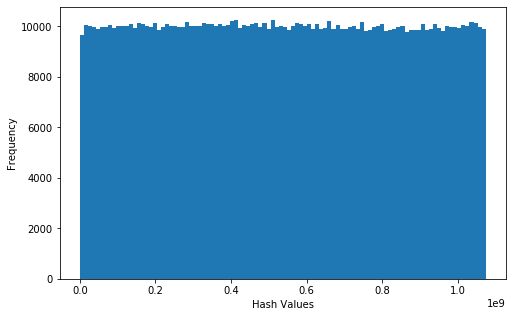

In [95]:
fig = plt.figure(figsize=(8,5))
plt.xlabel("Hash Values")
plt.ylabel("Frequency")
plt.hist(hash_values, bins=100)
plt.show()

### Bloom Filter implementation

Let's create a BloomFilter object of size $m$ (read the script **hashing_lib.py**).

In [18]:
bloom_filter = hs.BloomFilter(m)

We apply 7 different hash functions to the set of passwords1 to store them on our filter, then we apply the same 7 hash functions to the set of passwords2 to verify which of these are already stored in the filter.  
Furthermore, as requested, we calculate the execution time: this could be higher than the one strictly necessary to store passwords1 in the filter and check passwords2 because we also store all the passwords that are duplicated in a list (for a possible bonus task).

In [19]:
start = time.time()

bloom_filter.multi_hash_functions(passwords1, 7)
positives = bloom_filter.hash_searching(passwords2, 7)

end = time.time()

Finally we can save the probable duplicates in a txt file and evaluate the execution time of our algorithm.

In [11]:
with open('duplicates.txt', 'w') as f:
    for item in bloom_filter.duplicates:
        f.write("%s\n" % item)

In [123]:
run_time = int(end-start)
h = run_time/(60*60)
m = (h-int(h))*60
s = int((m-int(m))*60)

In [124]:
h, m = int(h), int(m)

Some characteristic quantities of our Bloom Filter are the following.

In [127]:
print("The number of hash functions we have used is:", k)
print("The number of possible duplicates that we found is:", positives)
print("The probability of finding a false positive is:", p)
print("An estimate for the number of true duplicates is:", int(positives-positives*p))
print("The execution time of our algorithm is about:", run_time, "s (", h,"h",m,"m",s,"s)")

The number of hash functions we have used is: 7
The number of possible duplicates that we found is: 14145218
The probability of finding a false positive is: 0.01
An estimate for the number of true duplicates is: 14003765
The execution time of our algorithm is about: 12651 s ( 3 h 30 m 51 s)


# Alphabetical Sort